<a href="https://colab.research.google.com/github/adityajain2407/DAV-1-Feb23-Tue/blob/main/07_prob_stat_feb23_clt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

In [2]:
df_hw = pd.read_csv("weight-height.csv")

In [3]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df_hw.shape

(10000, 3)

In [6]:
df_height = df_hw["Height"]

In [8]:
df_height.head() #population

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [9]:
mu = df_height.mean() #population mean

In [10]:
mu

66.36755975482124

In [11]:
sigma = df_height.std() #population std dev
sigma

3.8475281207732293

<Axes: xlabel='Height', ylabel='Count'>

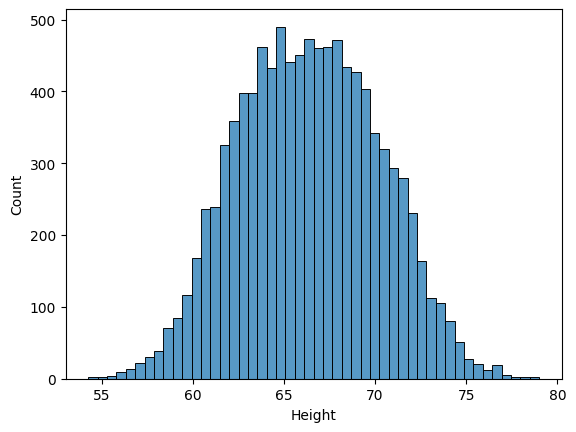

In [12]:
sns.histplot(df_height)

In [ ]:
#analysis for sample size 5

In [15]:
df_height.sample(5) #random selection of 5 rows

6091    65.204481
9605    63.329421
214     65.903301
9247    68.206414
3034    71.363595
Name: Height, dtype: float64

In [20]:
#every time, this mean is different
#it is close to the population mean of 66.3
np.mean(df_height.sample(5))

65.37328655308434

<Axes: ylabel='Count'>

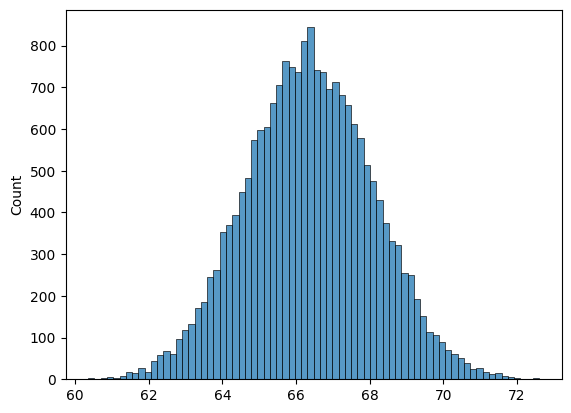

In [25]:
sample_mean_5 = [np.mean(df_height.sample(5)) for i in range(20000) ]
len(sample_mean_5) # each of these numbers represents a sample mean of sample size 5
sns.histplot(sample_mean_5)

In [26]:
np.mean(sample_mean_5)

66.36255067416181

In [27]:
np.std(sample_mean_5)

1.7226151841454147

In [44]:
sigma/np.sqrt(5) #standard error for n = 5

1.7206668846781923

In [28]:
#Do everything for sample size 20

In [29]:
df_height.sample(20) #random selection of 5 rows

2654    67.919671
7090    64.839564
8450    63.653964
1535    66.854111
262     70.993144
471     68.766162
3976    70.428942
4131    69.543116
9045    66.100469
362     64.955078
5024    66.103873
89      72.316825
5763    63.071171
3501    72.177193
1313    67.612220
5205    64.276243
5637    62.198927
7602    64.467889
7030    64.655848
4496    68.836933
Name: Height, dtype: float64

In [30]:
np.mean(df_height.sample(20))

66.82875512150743

In [31]:
sample_mean_20 = [np.mean(df_height.sample(20))  for i in range(20000)]

In [32]:
len(sample_mean_20)

20000

<Axes: ylabel='Count'>

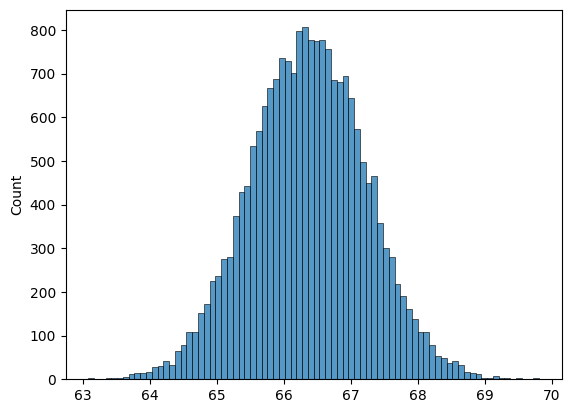

In [33]:
sns.histplot(sample_mean_20)

In [34]:
np.mean(sample_mean_20)

66.35823593182431

In [35]:
np.std(sample_mean_20)

0.8640633962275197

In [43]:
sigma/np.sqrt(20) #standard error for n = 20

0.8603334423390961

In [36]:
#Do everything for sample size 100

In [37]:
np.mean(df_height.sample(100))

65.65011698084976

In [38]:
sample_mean_100 = [np.mean(df_height.sample(100))  for i in range(20000)]

In [39]:
len(sample_mean_100)

20000

<Axes: ylabel='Count'>

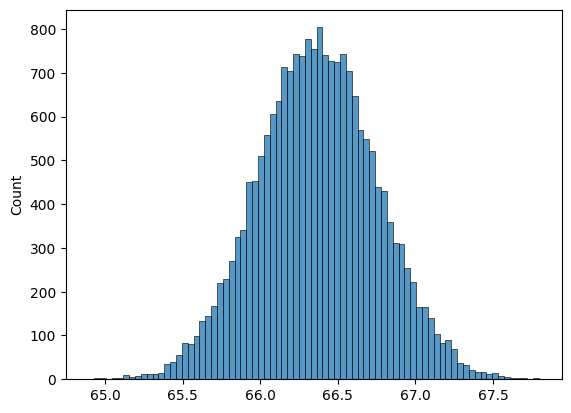

In [40]:
sns.histplot(sample_mean_100)

In [41]:
np.mean(sample_mean_100)

66.36730225812927

In [42]:
np.std(sample_mean_100)

0.3850606095775793

In [45]:
sigma/np.sqrt(100) #standard error for n = 100

0.3847528120773229

In [ ]:
'''
Systolic blood pressure of a group of people is known to have an average of 122 mmHg and a standard deviation of 10 mmHg. (normal distri)

Calculate the probability that the average blood pressure of 16 people will be greater than 125mmHg.
'''

In [46]:
#blood pressure eg:

In [47]:
z = (125 - 122)/2.5

In [48]:
ans = 1 - norm.cdf(z)

In [49]:
print(ans)

0.11506967022170822


In [ ]:
'''
Weekly toothpaste sales have a mean 1000 and std dev 200. (assume normal distri)
What is the probability that the average weekly sales next month is more than 1110?
'''

In [50]:
std_err = 200/np.sqrt(4)

In [51]:
z = (1110 - 1000)/std_err

In [52]:
prob_less = norm.cdf(z)

In [53]:
prob_more = 1 - prob_less

In [54]:
prob_more

0.13566606094638267

In [56]:
def clt_prob(mu , sigma, n, obs):
  std_err = sigma/np.sqrt(n)
  z = (obs - mu)/std_err
  prob_less = norm.cdf(z)
  prob_greater = 1 - norm.cdf(z)
  return prob_less, prob_greater

In [57]:
#blood pressure
clt_prob(122, 10, 16, 125)

(0.8849303297782918, 0.11506967022170822)

In [58]:
#toothpaste
clt_prob(1000, 200, 4, 1110)

(0.8643339390536173, 0.13566606094638267)

In [ ]:
'''
In an e-commerce website, the average purchase amount per customer is $80 with a standard deviation of $15.
If we randomly select a sample of 50 customers,
what is the probability that the average purchase amount in the sample will be less than $75?

'''

In [59]:
clt_prob(80, 15, 50, 75)

(0.009211062727049501, 0.9907889372729505)